### For Ian on social networks who is promoting this post:

datos/Ian'sPost.jpg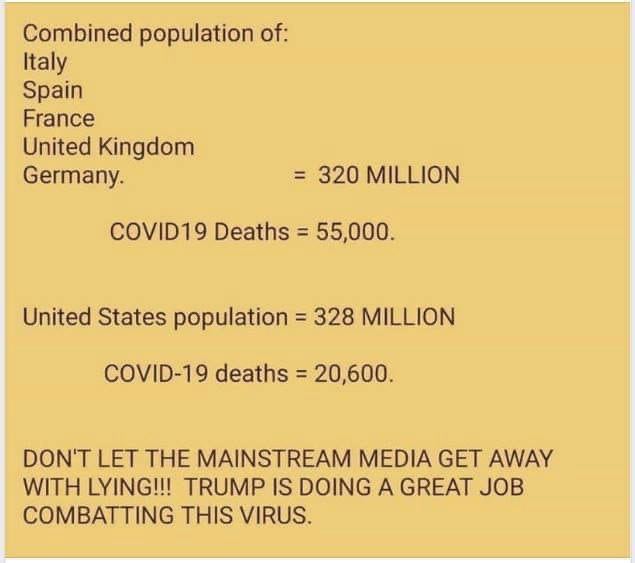

In [3]:
from IPython.display import display, Markdown, Latex
from pandas import read_csv
from datos.encabezado import fecha_actualizacion, tabla_de_datos
import random
folder_datos = 'datos/'
datos_mundo = read_csv(folder_datos + tabla_de_datos)
display(Markdown(f"""# I will show you the data for {fecha_actualizacion}, coming from the ECDC but you can play around with it to your satisfaction until you match your own numbers"""))
datos_mundo.head(10)

# I will show you the data for 18-04-2020, coming from the ECDC but you can play around with it to your satisfaction until you match your own numbers

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,18/04/2020,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0
1,17/04/2020,17,4,2020,10,4,Afghanistan,AF,AFG,37172386.0
2,16/04/2020,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
3,15/04/2020,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
4,14/04/2020,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
5,13/04/2020,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
6,12/04/2020,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
7,11/04/2020,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
8,10/04/2020,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
9,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0


# I will now make a selectiion of random European countries [from this list](https://www.schengenvisainfo.com/eu-countries/) that matches the population data of the USA (according to Ian's post it is 328,000,000).

In [22]:
EU_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
from collections import defaultdict
def_dict = defaultdict(list)
# Make a population dictionary by country
pop_dict = {}
for index, row in datos_mundo.iterrows():
    if row.countriesAndTerritories in EU_countries:
        pop_dict[row.countriesAndTerritories] = (row.popData2018)

# Look for death toll up until the selected date 'fecha_actualizacion'
totales_mundo = datos_mundo[['countriesAndTerritories', 'deaths']]
# Sum all deaths for every country per day registered by the ECDC
totales_mundo = totales_mundo.groupby(['countriesAndTerritories']).sum()

# Make a data structure with all this info
final_dict = {}
us_death_toll_to_update = 0
for index, row in totales_mundo.iterrows():
    if row.name in EU_countries:
        final_dict[row.name] = (row.deaths, pop_dict[row.name])
    elif row.name == 'United_States_of_America':
        us_death_toll_to_update = row.deaths

display(Markdown(f"""# By the way, this is the US death toll by Covid19 up to {us_death_toll_to_update:,} in {fecha_actualizacion} (DAY/MONTH/YEARS)"""))

random_population = 0
random_population_deaths_to_update = 0
randomly_selected_countries = []
while random_population <= 328000000:
    random_country = random.choice(EU_countries)
    random_population += final_dict[random_country][1]
    random_population_deaths_to_update += final_dict[random_country][0]
    EU_countries.remove(random_country)
    randomly_selected_countries.append(random_country)

display(Markdown(f"""# Here are your randomly selected countries with their respective population"""))

import locale
locale.setlocale(locale.LC_ALL, '')

for index, country in enumerate(randomly_selected_countries):
    display(Markdown(f"""{index+1}. {country} [ population =\t{int(final_dict[country][1]):,}], [deaths =\t{int(final_dict[country][0]):,}]"""))

display(Markdown(f"""
    RANDOM POPULATION TOTAL = {random_population:,} 
    RANDOM POPULATION DEATHS = {random_population_deaths_to_update:,}
    
    US POPULATION TOTAL = {328000000:,}
    US POPULATION DETHS = {us_death_toll_to_update:,}
    
    IS THE US POPULATION DEATH
    LARGER THAN ALL THESE RANDOM COUNTRIES COMBINED?
    {bool(us_death_toll_to_update>random_population_deaths_to_update)}
    """))

# By the way, this is the US death toll by Covid19 up to 37,054 in 18-04-2020 (DAY/MONTH/YEARS)

# Here are your randomly selected countries with their respective population

1. Slovakia [ population =	5,447,011], [deaths =	9]

2. Netherlands [ population =	17,231,017], [deaths =	3,459]

3. Poland [ population =	37,978,548], [deaths =	332]

4. Bulgaria [ population =	7,024,216], [deaths =	41]

5. Sweden [ population =	10,183,175], [deaths =	1,400]

6. Hungary [ population =	9,768,785], [deaths =	172]

7. Portugal [ population =	10,281,762], [deaths =	657]

8. Croatia [ population =	4,089,400], [deaths =	36]

9. Cyprus [ population =	1,189,265], [deaths =	17]

10. Slovenia [ population =	2,067,372], [deaths =	66]

11. Luxembourg [ population =	607,728], [deaths =	72]

12. Latvia [ population =	1,926,542], [deaths =	5]

13. Greece [ population =	10,727,668], [deaths =	105]

14. France [ population =	66,987,244], [deaths =	18,681]

15. Malta [ population =	483,530], [deaths =	3]

16. Estonia [ population =	1,320,884], [deaths =	38]

17. Germany [ population =	82,927,922], [deaths =	4,110]

18. Denmark [ population =	5,797,446], [deaths =	336]

19. Finland [ population =	5,518,050], [deaths =	82]

20. Czechia [ population =	10,625,695], [deaths =	173]

21. Lithuania [ population =	2,789,533], [deaths =	33]

22. Romania [ population =	19,473,936], [deaths =	400]

23. Ireland [ population =	4,853,506], [deaths =	530]

24. Belgium [ population =	11,422,068], [deaths =	5,163]


    RANDOM POPULATION TOTAL = 330,722,303.0 
    RANDOM POPULATION DEATHS = 35,920
    
    US POPULATION TOTAL = 328,000,000
    US POPULATION DETHS = 37,054
    
    IS THE US POPULATION DEATH
    LARGER THAN ALL THESE RANDOM COUNTRIES COMBINED?
    True
    

# The point is: You can manipulate the data this way almost however you like if you just pick the countries that fit your world view.